### Libraries, constants, and equations for Jerk attractor

In [7]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from scipy.integrate import LSODA
from tqdm import tqdm
figpath = r"H:\PERSONAL\PROJECTS\Programming\ACADEMICS\Int_lab2\NL_circuits\figures"



# Jerk Attractor

# Circuit parameters (resistances in Ohms, capacitances in Farads, voltages in Volts)
# FROM Msc thesis

R1 = 1e3
R2 = 1e3
R3 = 1e3
R4 = 1e3
R5 = 1.167e3 #variable (potentiometer) #ideal hit and trial value
R6 = 1e3 
alpha = 0.026
C1 = 1e-6
C2 = 1e-6
C3 = 1e-6

# Initial conditions
state_0 = np.array([0.0, 0.3, 0.0])
t_0 = 0.0
t_f = 0.8
max_step = 0.005

def equations(t, state):
    X, Y, Z = state
    
    # Non-linear circuit equations
    dxdt = Y / (C1 * R1)
    dydt = Z / (C2 * R2)
    dzdt = (- Z - ((R5/R6) * X) - (R5 * 1e-9 * (np.exp(Y / alpha) - 1))) / (C3 * R5)
    
    return [dxdt, dydt, dzdt]





### Solver and plot the attractor

In [5]:
# Solve the ODE system using LSODA method
sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)

# initialize the solution array
X = [ sol.y[0] ]
Y = [ sol.y[1] ]
Z = [ sol.y[2] ]
t = [ sol.t ]

print(sol.status)

while sol.status != 'finished':
    sol.step()
    t.append(sol.t)
    X.append(sol.y[0])
    Y.append(sol.y[1])
    Z.append(sol.y[2])
    

print(sol.status)

print(t[0], X[0], Y[0], Z[0])
print(t[-1], X[-1], Y[-1], Z[-1])
print(f"{len(t)} steps completed")

running
finished
0.0 0.0 0.3 0.0
0.8 0.19839283234549887 0.29726253908509 -0.04236525818080747
10344 steps completed


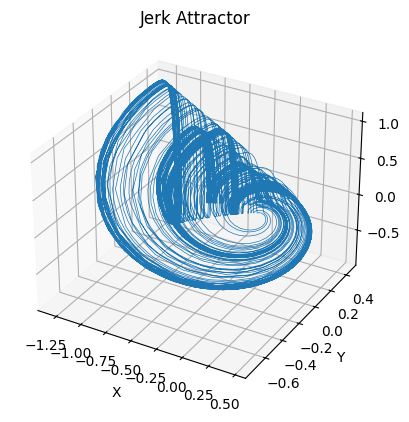

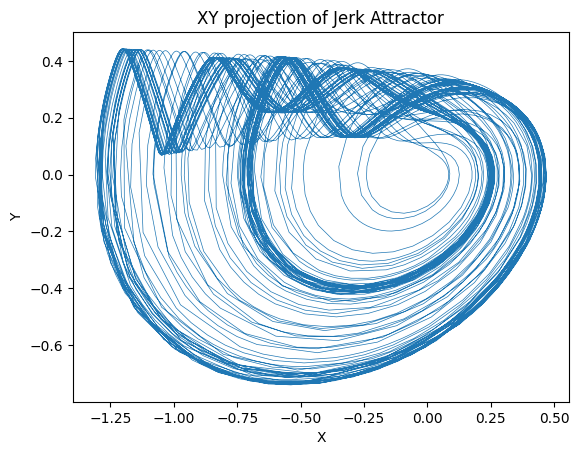

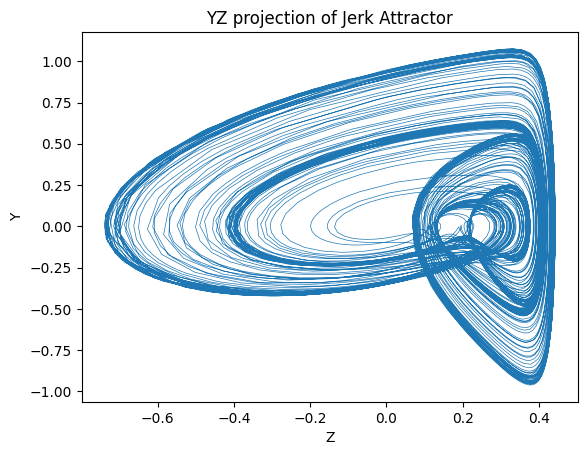

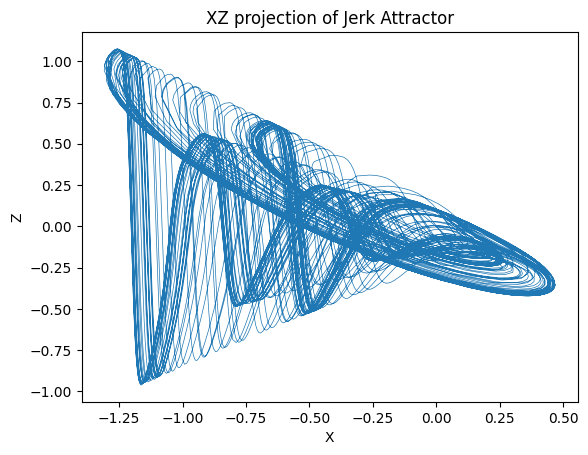

In [6]:
# # for creating a responsive plot
# %matplotlib widget
 
# creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Jerk Attractor')
plt.show() 

# Plot XY, YZ, XZ projections of the attractor as 3 different plots and save them 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('XY projection of Jerk Attractor')
plt.savefig(figpath+'\Jerk_sim_XY.png')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y, Z, lw=0.5)
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_title('YZ projection of Jerk Attractor')
plt.savefig(figpath+'\Jerk_sim_YZ.png')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('XZ projection of Jerk Attractor')
plt.savefig(figpath+'\Jerk_sim_XZ.png')



## Bifurcations

In [8]:
def solve_for_R5(curr_R5):
    R5 = curr_R5
    sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)
    X = [ sol.y[0] ]
    Y = [ sol.y[1] ]
    Z = [ sol.y[2] ]
    t = [ sol.t ]
    while sol.status != 'finished':
        sol.step()
        t.append(sol.t)
        X.append(sol.y[0])
        Y.append(sol.y[1])
        Z.append(sol.y[2])
    return t, X, Y, Z

### Bifurcation (Old version)

In [13]:
# # R5  ranges from 3.3 ohm to 2.040 kohm
# R6_values = np.linspace(3, 3000, 500)

# # initialize the bifurcation array
# X_max = []
# Y_max = []
# Z_max = []
# R6_X_max = []
# R6_Y_max = []
# R6_Z_max = []

# X_min = []
# Y_min = []
# Z_min = []
# R6_X_min = []
# R6_Y_min = []
# R6_Z_min = []

# for R6 in tqdm(R6_values):
#     t_, X_, Y_, Z_ = solve_for_R6(R6)

#     for i in range(1,len(t_)-1):

#         if (X_[i] > X_[i-1]) and (X_[i] > X_[i+1]):
#             X_max.append(X_[i])
#             R6_X_max.append(R6)
#         if (X_[i] < X_[i-1]) and (X_[i] < X_[i+1]):
#             X_min.append(X_[i])
#             R6_X_min.append(R6)
#         if (Y_[i] > Y_[i-1]) and (Y_[i] > Y_[i+1]):
#             Y_max.append(Y_[i])
#             R6_Y_max.append(R6)

#         if (Y_[i] < Y_[i-1]) and (Y_[i] < Y_[i+1]):
#             Y_min.append(Y_[i])
#             R6_Y_min.append(R6)
#         if (Z_[i] > Z_[i-1]) and (Z_[i] > Z_[i+1]):
#             Z_max.append(Z_[i])
#             R6_Z_max.append(R6)
#         if (Z_[i] < Z_[i-1]) and (Z_[i] < Z_[i+1]):
#             Z_min.append(Z_[i])
#             R6_Z_min.append(R6)    

In [14]:
# # Plot the bifurcation diagram
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(R6_X_max, X_max, 'r.', markersize=0.3, label='Maxima')
# ax.plot(R6_X_min, X_min, 'b.', markersize=0.3, label='Minima')
# ax.set_xlabel('R6')
# ax.set_ylabel('X')
# ax.set_title('Bifurcation diagram of X')
# ax.legend()
# plt.savefig(figpath+'\Jerk_sim_bifurcation1_X.png')

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(R6_Y_max, Y_max, 'r.', markersize=0.3, label='Maxima')
# ax.plot(R6_Y_min, Y_min, 'b.', markersize=0.3, label='Minima')
# ax.set_xlabel('R6')
# ax.set_ylabel('Y')
# ax.set_title('Bifurcation diagram of Y')
# ax.legend()
# plt.savefig(figpath+'\Jerk_sim_bifurcation1_Y.png')

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(R6_Z_max, Z_max, 'r.', markersize=0.3, label='Maxima')
# ax.plot(R6_Z_min, Z_min, 'b.', markersize=0.3, label='Minima')
# ax.set_xlabel('R6')
# ax.set_ylabel('Z')
# ax.set_title('Bifurcation diagram of Z')
# ax.legend()
# plt.savefig(figpath+'\Jerk_sim_bifurcation1_Z.png')


### Bifurcation 2 (improved detection of stable points)

In [9]:
# R5  ranges from 3.3 ohm to 2.040 kohm
R5_values = np.linspace(300, 1500, 500)

# initialize the bifurcation array
X2_max = []
Y2_max = []
Z2_max = []
R5_X2_max = []
R5_Y2_max = []
R5_Z2_max = []

X2_min = []
Y2_min = []
Z2_min = []
R5_X2_min = []
R5_Y2_min = []
R5_Z2_min = []

for R5 in tqdm(R5_values):
    t_, X_, Y_, Z_ = solve_for_R5(R5)

    for i in range(1,len(t_)-1):

        if ((X_[i] >= X_[i-1]) and (X_[i] >= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_max.append(X_[i])
            R5_X2_max.append(R5)
        if ((X_[i] <= X_[i-1]) and (X_[i] <= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_min.append(X_[i])
            R5_X2_min.append(R5)
            
        if ((Y_[i] >= Y_[i-1]) and (Y_[i] >= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_max.append(Y_[i])
            R5_Y2_max.append(R5)
        if ((Y_[i] <= Y_[i-1]) and (Y_[i] <= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_min.append(Y_[i])
            R5_Y2_min.append(R5)
            
        if ((Z_[i] >= Z_[i-1]) and (Z_[i] >= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_max.append(Z_[i])
            R5_Z2_max.append(R5)
        if ((Z_[i] <= Z_[i-1]) and (Z_[i] <= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_min.append(Z_[i])
            R5_Z2_min.append(R5)

 75%|███████▍  | 373/500 [03:02<01:06,  1.91it/s]C:\Users\adhil\AppData\Local\Temp\ipykernel_12900\3091710761.py:38: RuntimeWarning: overflow encountered in exp
  dzdt = (- Z - ((R5/R6) * X) - (R5 * 1e-9 * (np.exp(Y / alpha) - 1))) / (C3 * R5)
100%|██████████| 500/500 [04:10<00:00,  2.00it/s]


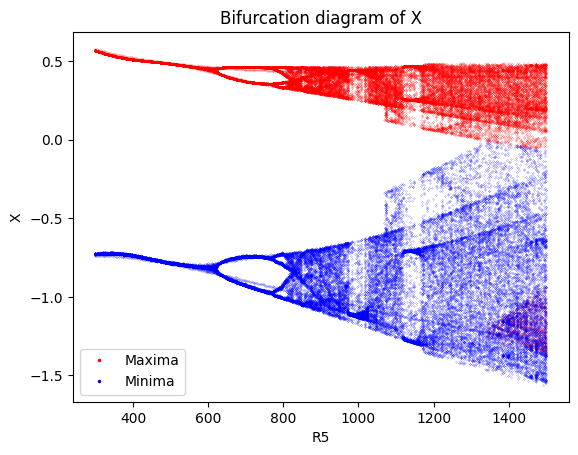

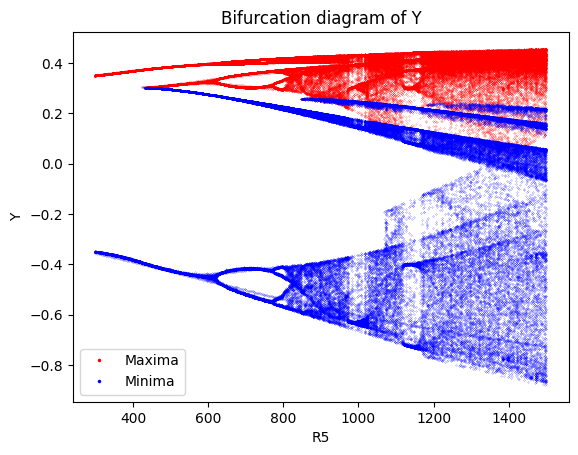

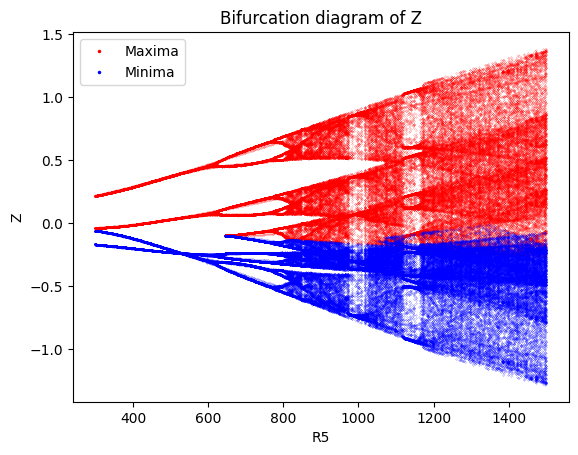

In [11]:
# plot the bifurcation diagram

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_X2_max, X2_max, 'r.', markersize=0.3, label='Maxima')
ax.plot(R5_X2_min, X2_min, 'b.', markersize=0.3, label='Minima')
ax.set_xlabel('R5')
ax.set_ylabel('X')
ax.set_title('Bifurcation diagram of X')
ax.legend(markerscale=10.)
# plt.savefig(figpath+'\Jerk_sim_bifurcation4_X.png')
plt.show()
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Y2_max, Y2_max, 'r.', markersize=0.3, label='Maxima')
ax.plot(R5_Y2_min, Y2_min, 'b.', markersize=0.3, label='Minima')
ax.set_xlabel('R5')
ax.set_ylabel('Y')
ax.set_title('Bifurcation diagram of Y')
ax.legend(markerscale=10.)
# plt.savefig(figpath+'\Jerk_sim_bifurcation4_Y.png')
plt.show()
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Z2_max, Z2_max, 'r.', markersize=0.3, label='Maxima')
ax.plot(R5_Z2_min, Z2_min, 'b.', markersize=0.3, label='Minima')
ax.set_xlabel('R5')
ax.set_ylabel('Z')
ax.set_title('Bifurcation diagram of Z')
ax.legend(markerscale=10.)
# plt.savefig(figpath+'\Jerk_sim_bifurcation4_Z.png')
plt.show()
plt.close()